# Clustering Algorithms - K-Means Demo

Now that you have been introduced to clustering algorithms, we will demonstrate how it is done in Python.

## Introduction
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. 

We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

### Generate the dataset and plot for visual inspection
We can probably pick out the clusters visually if we plot them in the feature space. In this example, we will generate a dataset with two features and 300 samples. Once it's generated, we will plot the dataset to visually inspect the clusters.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

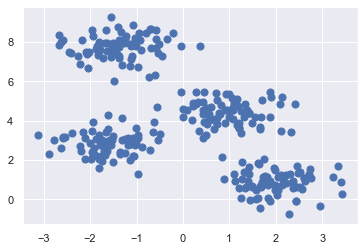

In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

### Cluster with k-means and plot again for validation
Based on visual inspection, the appropriate number of clusters appears to be 4. We will fit the `KMeans` model from `sklearn.cluster` to our feature data and then plot the predicted clusters and their centroids.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

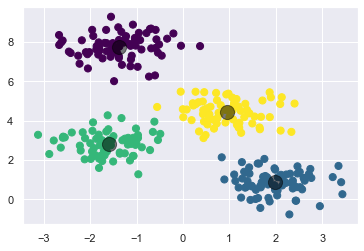

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Evaluation and Tuning
In order to determine the optimal number of clusters, we can try different values and measure the quality of our clusters with each iteration and select the model with the highest quality.

#### Evaluation Metrics
We discussed a few measures of cluster quality we can use to assess our clusters in a more objective way, including:

- Within clusters:
    - __Inertia__: Measures how close objects are to their cluster centroid
    - __Cohesion__: Measures how close objects are to other members in their cluster

- Between clusters
    - __Separation__: Measures how distinct clusters are from one another

- A combination of measurements:
    - __Silhouette__: Based on a combination of Cohesion and Separation
    
We will access some metrics from the model directly, and for others we will use `sklearn.metrics`.

In [5]:
print("Inertia: " + str(kmeans.inertia_))

Inertia: 212.00599621083472


What you want is a model with a low inertia AND low number of clusters, but that is a tradeoff.

In [6]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(X, y_kmeans)
print("Silhouette: " + str(s_score))

Silhouette: 0.6819938690643478


For silhoutte score, we want a value that's closer to one than negative one.

#### Tuning
We can try different values for the `n_clusters` parameter and measure the quality with each iteration to determine the optimal value and confirm our visual assessment.

It's helpful to plot the results of each iteration to see the impact on each metric.

In [7]:
inertia = []
sil = []

# changing the number of clusters 
for k in range(2,11):
    
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

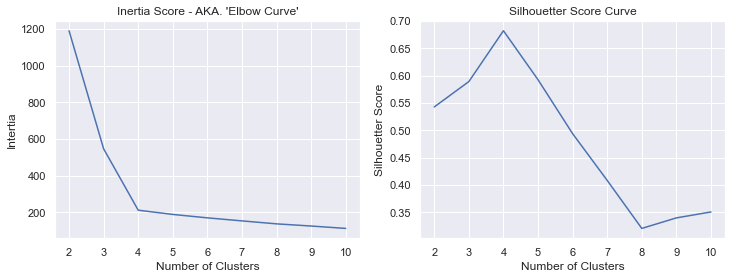

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title("Inertia Score - AKA. 'Elbow Curve'")

# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

#### Final assessment
The silouette score confirms our visual evaluation that the optimal number of clusters for this particular dataset appears to be 4, which makes sense since it was generated as such at the start of the demonstration.

It's important to understand that the intertia score will continue to improve as we break the data down into smaller and smaller clusters. However, there is an obvious point at Number of Clusters equal to 4 where the improvement in the intertia metric starts to level off. This is known as the _elbow_ and is the optimal point from the intertia perspective.

Finally, we can take a look at each prediction for each observation.

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

### Limitations
The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

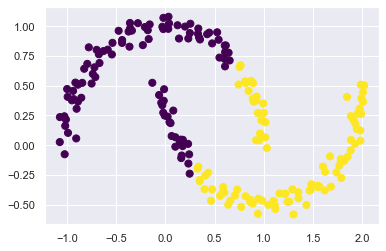

In [11]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### DHS Use Case - Clustering Filipino Households

Similar to the hierarchical clustering sample, we will attempt to cluster the household dataset based on the size of the households, their environment, their water sources, and their health status.

#### Step 1: Load the dataset and its dictionaries

To save us time in recoding the different datasets, we can use the recoded SPSS files provided by DHS. To read the data, we need to use a pyreadstat python package instead of pandas.

The code for loading the data and its dictionaries are prepared below.

In [12]:
import pyreadstat
import pandas as pd

df, meta = pyreadstat.read_sav('data/PHHR71FL.SAV')
df.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SH233X$1,SH233X$2,SH233X$3,SH233X$4,SH233X$5,SH233Z$1,SH233Z$2,SH233Z$3,SH233Z$4,SH233Z$5
0,00010001,PH7,1.0,1.0,1.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00010002,PH7,1.0,2.0,4.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00010004,PH7,1.0,4.0,2.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00010007,PH7,1.0,7.0,2.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00010008,PH7,1.0,8.0,1.0,1.0,364301.0,8.0,2017.0,1412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
meta.column_names_to_labels

{'HHID': 'Case Identification',
 'HV000': 'Country code and phase',
 'HV001': 'Cluster number',
 'HV002': 'Household number',
 'HV003': "Respondent's line number (answering Household questionnaire)",
 'HV004': 'Ultimate area unit',
 'HV005': 'Household sample weight (6 decimals)',
 'HV006': 'Month of interview',
 'HV007': 'Year of interview',
 'HV008': 'Date of interview (CMC)',
 'HV008A': 'Date of interview Century Day Code (CDC)',
 'HV009': 'Number of household members',
 'HV010': 'Number of eligible women in household',
 'HV011': 'NA - Number of eligible men in household',
 'HV012': 'Number of de jure members',
 'HV013': 'Number of de facto members',
 'HV014': 'Number of children 5 and under (de jure)',
 'HV015': 'Result of household interview',
 'HV016': 'Day of interview',
 'HV017': 'Number of visits',
 'HV018': 'Interviewer identification',
 'HV019': 'NA - Keyer identification',
 'HV020': 'Ever-married sample',
 'HV021': 'Primary sampling unit',
 'HV022': 'Sample strata for sampl

In [14]:
meta.variable_value_labels

{'HV003': {0.0: 'Incomplete household'},
 'HV015': {1.0: 'Completed',
  2.0: 'No Household member/no competent member at home',
  3.0: 'Entire Household absent for extended period of time',
  4.0: 'Postponed',
  5.0: 'Refused',
  6.0: 'Dwelling vacant or address not a dwelling',
  7.0: 'Dwelling destroyed',
  8.0: 'Dwelling not found',
  9.0: 'Other'},
 'HV020': {0.0: 'All woman sample', 1.0: 'Ever married sample'},
 'HV022': {1.0: 'BASILAN',
  2.0: 'CITY OF ISABELA',
  3.0: 'LANAO DEL SUR',
  4.0: 'MAGUINDANAO',
  5.0: 'COTABATO CITY',
  6.0: 'SULU',
  7.0: 'TAWI-TAWI',
  8.0: 'ABRA',
  9.0: 'APAYAO',
  10.0: 'BAGUIO CITY',
  11.0: 'BENGUET (Excluding Baguio City)',
  12.0: 'IFUGAO',
  13.0: 'KALINGA',
  14.0: 'MOUNTAIN PROVINCE',
  15.0: 'BUTUAN CITY (Capital)',
  16.0: 'AGUSAN DEL NORTE (Excluding Butuan City)',
  17.0: 'AGUSAN DEL SUR',
  18.0: 'DINAGAT ISLANDS',
  19.0: 'SURIGAO DEL NORTE',
  20.0: 'SURIGAO DEL SUR',
  21.0: 'CALOOCAN CITY',
  22.0: 'CITY OF MALABON',
  23.0: 'CIT

Do usual data cleaning.

In [15]:
df.dropna(axis = 1, how = 'all', inplace = True)
df = df.loc[:,~df.columns.str.contains('\$')]

df = df.set_index('HHID')

df.shape

(27496, 337)

#### Step 2: Selecting & scaling features 
Select the columns you want to use for clustering and do feature scaling using `Normalizer` from sklearn.preprocessing. 

Since what we have is a data with large dimensions, it will be difficult to use all columns for clustering.

While there are different ways to select features for clustering, they will make more sense when we learn more advanced concepts. For the meantime, let's select our feature based off its relevance to our objective.

_For future reference, here's another source that outlines how to select features for kmeans: [link](https://medium.com/analytics-vidhya/k-means-algorithm-in-4-parts-4-4-42bc6c781e46)._

In [16]:
feature_cols = ['HV009','HV014','HV025', 'HV201', 'HV202', 'SH202', 'SH207', 'SH221A']

for col in feature_cols:
    print(f'{col}: {meta.column_names_to_labels[col]}')

HV009: Number of household members
HV014: Number of children 5 and under (de jure)
HV025: Type of place of residence
HV201: Source of drinking water
HV202: Source of non-drinking water
SH202: Number of sick/injured persons
SH207: How many of your HH members visited a health facility for consultation/advise or treatment In the last 30 days
SH221A: Number of persons confined in a hospital/clinic


In [17]:
data = df[feature_cols].copy().fillna(0)

In [18]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X = scaler.fit_transform(data)

#### Step 3: Training initial K-Means
Train initial KMeans model with n_clusters = 5, and print out the inertia and silhouette_score

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [20]:
print("Inertia: " + str(kmeans.inertia_))

Inertia: 260.3957823286757


In [21]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(X, y_kmeans)
print("Silhouette: " + str(s_score))

Silhouette: 0.45068751000696816


#### Step 4: Tuning the K-Means model 
Tune the model by trying different values for `n_clusters` between 3-20 and plot the results to determine the best parameter.

In [22]:
inertia = []
sil = []

# changing the number of clusters 
for k in range(3,20):
    
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

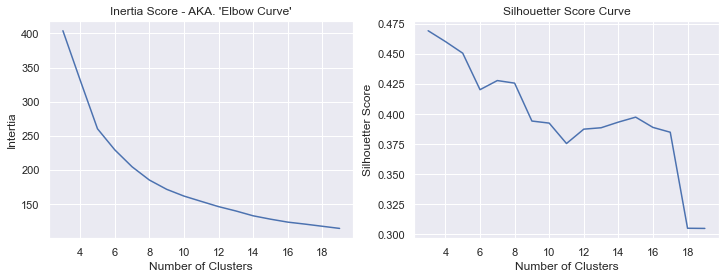

In [23]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title("Inertia Score - AKA. 'Elbow Curve'")

# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

#### Step 5: Identify the optimal number of clusters
Apply the optimal number of clusters and append cluster labels to your original df.

In [24]:
kmeans = KMeans(n_clusters=5, random_state = 42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

In [25]:
data['cluster_labels'] = cluster_labels

#### Step 6: Inspect your different clusters

In [26]:
data[data['cluster_labels'] == 0]

,HV009,HV014,HV025,HV201,HV202,SH202,SH207,SH221A,cluster_labels
HHID,,,,,,,,,
00030024,2.0,0.0,2.0,71.0,32.0,0.0,0.0,0.0,0
00070008,4.0,0.0,2.0,71.0,31.0,0.0,0.0,0.0,0
00070020,5.0,0.0,2.0,71.0,31.0,0.0,0.0,0.0,0
00090004,6.0,3.0,2.0,71.0,32.0,1.0,1.0,0.0,0
00090016,2.0,0.0,2.0,71.0,41.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
12480008,4.0,0.0,2.0,71.0,21.0,1.0,0.0,1.0,0
12480015,2.0,0.0,2.0,71.0,21.0,1.0,0.0,0.0,0
12480017,6.0,0.0,2.0,71.0,21.0,0.0,0.0,0.0,0


In [27]:
data[data['cluster_labels'] == 1]

,HV009,HV014,HV025,HV201,HV202,SH202,SH207,SH221A,cluster_labels
HHID,,,,,,,,,
00010009,2.0,0.0,2.0,11.0,0.0,0.0,1.0,0.0,1
00020006,2.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,1
00020018,7.0,2.0,2.0,31.0,0.0,0.0,0.0,0.0,1
00020020,2.0,0.0,2.0,13.0,0.0,2.0,1.0,0.0,1
00020023,2.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
12500019,4.0,0.0,2.0,41.0,0.0,0.0,0.0,0.0,1
12500021,1.0,0.0,2.0,41.0,0.0,0.0,1.0,0.0,1
12500023,5.0,0.0,2.0,42.0,0.0,0.0,1.0,2.0,1


In [28]:
data[data['cluster_labels'] == 2]

,HV009,HV014,HV025,HV201,HV202,SH202,SH207,SH221A,cluster_labels
HHID,,,,,,,,,
00010007,5.0,2.0,2.0,13.0,0.0,0.0,0.0,0.0,2
00010012,4.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,2
00010013,4.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,2
00010027,3.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,2
00010029,3.0,1.0,2.0,13.0,0.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...
12500002,4.0,2.0,2.0,12.0,0.0,0.0,0.0,0.0,2
12500003,8.0,3.0,2.0,32.0,0.0,0.0,1.0,0.0,2
12500006,3.0,1.0,2.0,12.0,0.0,0.0,0.0,0.0,2


In [29]:
data[data['cluster_labels'] == 3]

,HV009,HV014,HV025,HV201,HV202,SH202,SH207,SH221A,cluster_labels
HHID,,,,,,,,,
00010002,5.0,1.0,2.0,71.0,11.0,0.0,0.0,0.0,3
00010004,4.0,0.0,2.0,71.0,11.0,0.0,0.0,0.0,3
00020011,3.0,0.0,2.0,71.0,11.0,0.0,0.0,0.0,3
00030010,6.0,2.0,2.0,71.0,11.0,1.0,1.0,0.0,3
00030013,5.0,0.0,2.0,71.0,11.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...
12410023,5.0,0.0,1.0,71.0,11.0,0.0,0.0,0.0,3
12410027,2.0,0.0,1.0,71.0,11.0,0.0,0.0,0.0,3
12450002,3.0,0.0,2.0,71.0,14.0,0.0,0.0,0.0,3


In [30]:
data[data['cluster_labels'] == 4]

,HV009,HV014,HV025,HV201,HV202,SH202,SH207,SH221A,cluster_labels
HHID,,,,,,,,,
00010001,8.0,1.0,2.0,11.0,0.0,2.0,2.0,0.0,4
00010008,11.0,0.0,2.0,11.0,0.0,1.0,0.0,0.0,4
00010010,9.0,3.0,2.0,11.0,0.0,1.0,0.0,0.0,4
00010011,6.0,2.0,2.0,11.0,0.0,1.0,1.0,0.0,4
00010014,6.0,1.0,2.0,13.0,0.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...
12480023,14.0,3.0,2.0,21.0,0.0,1.0,0.0,1.0,4
12490014,6.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,4
12500014,11.0,2.0,2.0,12.0,0.0,0.0,0.0,0.0,4


---------------------------------------
# Process Summary

__Step 1__: Import the dataset

__Step 2__: Select the columns you want to use for clustering and do feature scaling using `Normalizer` from `sklearn.preprocessing`.

__Step 3:__ Train initial KMeans model with `n_clusters` = 5, and print out the `inertia` and `silhouette_score`

__Step 4:__ Tune the model by trying different values for `n_clusters` between 3-20 and plot the results to determine the best parameter.

__Step 5:__ Apply the optimal number of clusters and append cluster labels to your original df.

__Step 6:__ Inspect which units were assigned to each group when we applied the optimal number of clusters. Nuance groups by the features used to do the clustering and by all other information available (e.g. demographics, location).